In [3]:
from math import log, ceil
from abstractcollection import AbstractCollection
from bstnode import BSTNode
from linkedstack import LinkedStack
from random import sample, shuffle
import time
import sys
import matplotlib.pyplot as plt

In [2]:
sys.setrecursionlimit(10**6)

In [3]:


class LinkedBST(AbstractCollection):
    """An link-based binary search tree implementation."""

    def __init__(self, sourceCollection=None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it's present."""
        self._root = None
        AbstractCollection.__init__(self, sourceCollection)

    # Accessor methods
    def __str__(self):
        """Returns a string representation with the tree rotated
        90 degrees counterclockwise."""

        def recurse(node, level):
            s_s = ""
            if node is not None:
                s_s += recurse(node.right, level + 1)
                s_s += "| " * level
                s_s += str(node.data) + "\n"
                s_s += recurse(node.left, level + 1)
            return s_s

        return recurse(self._root, 0)

    def __iter__(self):
        """Supports a preorder traversal on a view of self."""
        if not self.isEmpty():
            stack = LinkedStack()
            stack.push(self._root)
            while not stack.isEmpty():
                node = stack.pop()
                yield node.data
                if node.right is not None:
                    stack.push(node.right)
                if node.left is not None:
                    stack.push(node.left)

    def preorder(self):
        """Supports a preorder traversal on a view of self."""
        return None

    def inorder(self):
        """Supports an inorder traversal on a view of self."""
        lyst = list()

        def recurse(node):
            if node is not None:
                recurse(node.left)
                lyst.append(node.data)
                recurse(node.right)

        recurse(self._root)
        return iter(lyst)

    def postorder(self):
        """Supports a postorder traversal on a view of self."""
        return None

    def levelorder(self):
        """Supports a levelorder traversal on a view of self."""
        return None

    def __contains__(self, item):
        """Returns True if target is found or False otherwise."""
        return self.find(item) is not None

    def find(self, item):
        """If item matches an item in self, returns the
        matched item, or None otherwise."""

        def recurse(node):
            if node is None:
                return None
            elif item == node.data:
                return node.data
            elif item < node.data:
                return recurse(node.left)
            else:
                return recurse(node.right)

        return recurse(self._root)

    # Mutator methods
    def clear(self):
        """Makes self become empty."""
        self._root = None
        self._size = 0

    def add(self, item):
        """Adds item to the tree."""

        # Helper function to search for item's position
        def recurse(node):
            # New item is less, go left until spot is found
            if item < node.data:
                if node.left is None:
                    node.left = BSTNode(item)
                else:
                    recurse(node.left)
            # New item is greater or equal,
            # go right until spot is found
            elif node.right is None:
                node.right = BSTNode(item)
            else:
                recurse(node.right)
                # End of recurse

        # Tree is empty, so new item goes at the root
        if self.isEmpty():
            self._root = BSTNode(item)
        # Otherwise, search for the item's spot
        else:
            recurse(self._root)
        self._size += 1

    def remove(self, item):
        """Precondition: item is in self.
        Raises: KeyError if item is not in self.
        postcondition: item is removed from self."""
        if not item in self:
            raise KeyError("Item not in tree.""")

        # Helper function to adjust placement of an item
        def liftMaxInLeftSubtreeToTop(top):
            # Replace top's datum with the maximum datum in the left subtree
            # Pre:  top has a left child
            # Post: the maximum node in top's left subtree
            #       has been removed
            # Post: top.data = maximum value in top's left subtree
            parent = top
            currentNode = top.left
            while not currentNode.right is None:
                parent = currentNode
                currentNode = currentNode.right
            top.data = currentNode.data
            if parent == top:
                top.left = currentNode.left
            else:
                parent.right = currentNode.left

        # Begin main part of the method
        if self.isEmpty(): return None

        # Attempt to locate the node containing the item
        itemRemoved = None
        preRoot = BSTNode(None)
        preRoot.left = self._root
        parent = preRoot
        direction = 'L'
        currentNode = self._root
        while not currentNode == None:
            if currentNode.data == item:
                itemRemoved = currentNode.data
                break
            parent = currentNode
            if currentNode.data > item:
                direction = 'L'
                currentNode = currentNode.left
            else:
                direction = 'R'
                currentNode = currentNode.right

        # Return None if the item is absent
        if itemRemoved is None: return None

        # The item is present, so remove its node

        # Case 1: The node has a left and a right child
        #         Replace the node's value with the maximum value in the
        #         left subtree
        #         Delete the maximium node in the left subtree
        if not currentNode.left is None \
                and not currentNode.right is None:
            liftMaxInLeftSubtreeToTop(currentNode)
        else:

            # Case 2: The node has no left child
            if currentNode.left is None:
                newChild = currentNode.right

                # Case 3: The node has no right child
            else:
                newChild = currentNode.left

                # Case 2 & 3: Tie the parent to the new child
            if direction == 'L':
                parent.left = newChild
            else:
                parent.right = newChild

        # All cases: Reset the root (if it hasn't changed no harm done)
        #            Decrement the collection's size counter
        #            Return the item
        self._size -= 1
        if self.isEmpty():
            self._root = None
        else:
            self._root = preRoot.left
        return itemRemoved

    def replace(self, item, newItem):
        """
        If item is in self, replaces it with newItem and
        returns the old item, or returns None otherwise."""
        probe = self._root
        while probe is not None:
            if probe.data == item:
                oldData = probe.data
                probe.data = newItem
                return oldData
            elif probe.data > item:
                probe = probe.left
            else:
                probe = probe.right
        return None

    def is_leaf(self, p):
        """
        Checks if node is leaf
        """
        return (p.left is None) and (p.right is None)


    def height(self):
        '''
        Return the height of tree
        :return: int
        '''
        if self._root is None:
            return -1
        def height1(top):
            '''
            Helper function
            :param top:
            :return:
            '''
            if (top is None) or (self.is_leaf(top)):
                return 0
            else:
                left_height = 1 + height1(top.left)
                right_height = 1 + height1(top.right)
            return max(right_height, left_height)
        return height1(self._root)

    def count_nodes(self, root):
        if root is None:
            return 0
        else:
            return 1 + self.count_nodes(root.left) + self.count_nodes(root.right)

    def is_balanced(self):
        '''
        Return True if tree is balanced
        :return:
        '''

        num_of_nodes = self.count_nodes(self._root)
        heigth = self.height()
        expected_max_height = 2 * log(num_of_nodes + 1, 2) - 1
        return heigth < expected_max_height

    def range_find(self, low, high):
        '''
        Returns a list of the items in the tree, where low <= item <= high."""
        :param low:
        :param high:
        :return:
        '''
        def _range_find_helper(current, low, hight, result):
            if current is None:
                return

            if low <= current.data <= high:
                result.append(current.data)

            if current.data >= low:
                _range_find_helper(current.left, low, high, result)

            if current.data <= hight:
                _range_find_helper(current.right, low, hight, result)

        result = []
        current = self._root
        _range_find_helper(current, low, high, result)
        return result

    def rebalance(self):
        '''
        Rebalances the tree.
        :return:
        '''
        inorder_list = self.inorder()
        self.clear()
        sorted_lst = sorted(inorder_list)

        def add_element_balanced(lst):

            if not lst:
                return

            mid = ceil((len(lst)//2))
            self.add(lst[mid])

            left_part, right_part = lst[:mid], lst[mid+1:]
            
            add_element_balanced(left_part)
            add_element_balanced(right_part)

        return add_element_balanced(sorted_lst)


    def successor(self, item):
        """
        Returns the smallest item that is larger than
        item, or None if there is no such item.
        :param item:
        :type item:
        :return:
        :rtype:
        """
        current = self._root
        successor = None
        while current:
            if current.data > item:
                successor = current.data
                current = current.left
            else:
                current = current.right
        return successor


    def predecessor(self, item):
        """
        Returns the largest item that is smaller than
        item, or None if there is no such item.
        :param item:
        :type item:
        :return:
        :rtype:
        """
        current = self._root
        predecessor = None
        while current:
            if current.data < item:
                predecessor = current.data
                current = current.right
            else:
                current = current.left
        return predecessor

    @staticmethod
    def search_in_list(words_to_search, all_words):
        t_start = time.time()
        for i in words_to_search:
            all_words.index(i)
        t_end = time.time()
        return t_end - t_start

    @staticmethod
    def search_in_alph_tree(words_to_search, all_words):
        alphabetic_tree = LinkedBST(all_words)
        t_start = time.time()
        for i in words_to_search:
            alphabetic_tree.find(i)
        t_end = time.time()
        return t_end - t_start

    @staticmethod
    def search_in_rand_tree(words_to_search, all_words):
        random_tree = LinkedBST(all_words)
        t_start = time.time()
        for i in words_to_search:
            random_tree.find(i)
        t_end = time.time()
        return t_end - t_start

    @staticmethod
    def search_in_rebalanced_tree(words_to_search, all_words):
        tree = LinkedBST(all_words)
        tree.rebalance()
        t_start = time.time()
        for i in words_to_search:
            tree.find(i)
        t_end = time.time()
        return t_end - t_start

    @staticmethod
    def buid_general_graph(t_1, t_2, t_3, t_4):
        data = {'Search in list':t_1,'Search in tree build alphabeticly': t_2,\
             'Search in tree build randimly': t_3, 'Search in rebalanced tree': t_4}

        experiments = list(data.keys())
        time = list(data.values())

        fig = plt.figure(figsize = (10, 5))
        plt.bar(experiments, time, color ='pink', width = 0.4)
 
        plt.xlabel("Experiments")
        plt.ylabel("Time(s)")
        plt.title("Searching 10,000 words in various data structures")
        plt.ylim(0, 90)
        plt.show()

    @staticmethod
    def build_graph_trees(t_3, t_4):
        data = {'Search in tree build randimly': t_3, 'Search in rebalanced tree': t_4}
        experiments = list(data.keys())
        time = list(data.values())

        fig = plt.figure(figsize = (10, 5))
        plt.bar(experiments, time, color ='purple', width = 0.4)
 
        plt.xlabel("Experiments")
        plt.ylabel("Time(s)")
        plt.title("Searching 10,000 words in binary trees")
        plt.ylim(0, 0.125)
        plt.show()


    def demo_bst(self, path, graph = True):
        """
        Demonstration of efficiency binary search tree for the search tasks.
        :param path:
        :type path:
        :return:
        :rtype:
        """
        # reading file
        with open(path, 'r', encoding='UTF-8') as f:
            text = f.readlines()
            all_words = [i.strip() for i in text]
        random_words = sample(all_words, 10000)
       
        # 1) searh 10 000 random words in list using bult-in list functions
        time_1 = LinkedBST.search_in_list(random_words, all_words)

        # 2) searching 10 000 random words in binary tree created by adding elements alphabetically
        time_2 = LinkedBST.search_in_alph_tree(random_words, all_words)

        # 3)searching 10 000 random words in binary tree created by adding elements randomly
        shuffle(all_words)
        time_3 = LinkedBST.search_in_rand_tree(random_words, all_words)

        # 4) searching 10 000 random words in rebalanced binary tree
        time_4 = LinkedBST.search_in_rebalanced_tree(random_words, all_words)

        print(f'Search time in list: {time_1}')
        print(f'Search time in binary tree (created by adding elements alphabetically): {time_2}')
        print(f'Search time in binary tree (created by adding elements randomly): {time_3}')
        print(f'Search time in rebalanced binary tree : {time_4}')

        if graph:
            LinkedBST.buid_general_graph(time_1, time_2, time_3, time_4)
            LinkedBST.build_graph_trees(time_3, time_4)


        



Search time in list: 7.953481912612915
Search time in binary tree (created by adding elements alphabetically): 68.39430093765259
Search time in binary tree (created by adding elements randomly): 0.025155067443847656
Search time in rebalanced binary tree : 0.01888108253479004


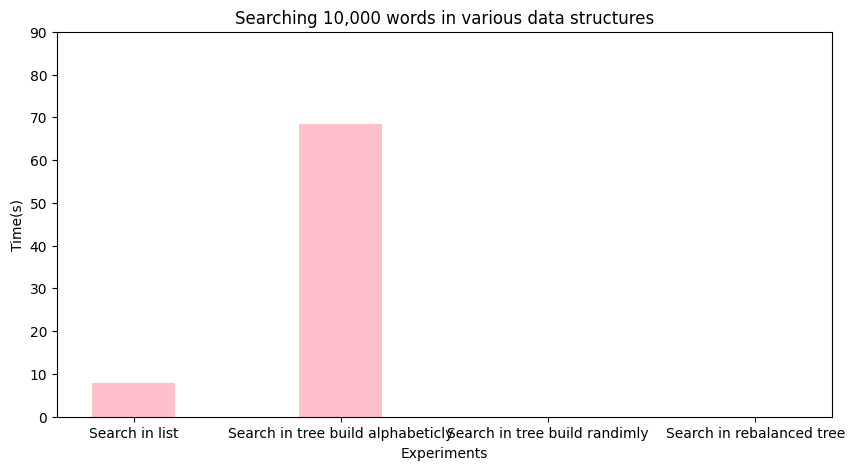

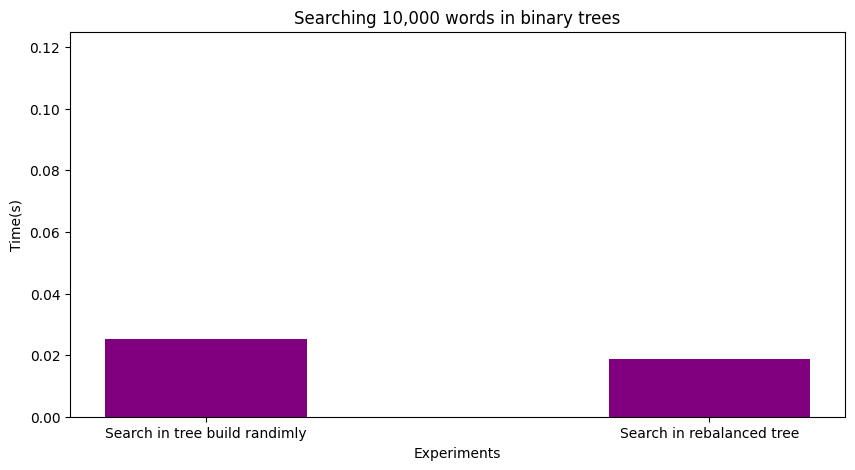

In [4]:

obj = LinkedBST()
obj.demo_bst('words.txt')

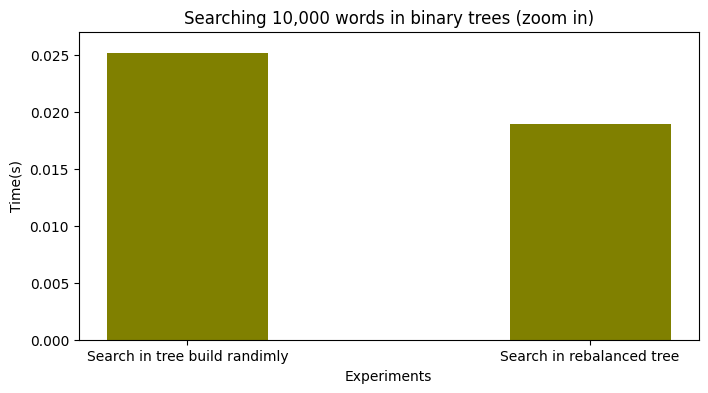

In [6]:

t_rand = 0.025155067443847656
t_rebal = 0.01888108253479004
data = {'Search in tree build randimly': t_rand, 'Search in rebalanced tree': t_rebal}
experiments = list(data.keys())
time = list(data.values())

fig = plt.figure(figsize = (8, 4))
plt.bar(experiments, time, color ='olive', width = 0.4)

plt.xlabel("Experiments")
plt.ylabel("Time(s)")
plt.title("Searching 10,000 words in binary trees (zoom in)")
plt.ylim(0, 0.027)
plt.show()